In [39]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [40]:
def convolution2d(image, kernel,):
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
   

    padding_h = (kernel_h - 1) // 2
    padding_w = (kernel_w - 1) // 2

    padded_image = np.pad(image, ((padding_h, padding_h), (padding_w, padding_w)), mode='constant', constant_values=0)
    output = np.zeros((image_h, image_w))

    print(output.size)
    
    for i in range(image_h):
        for j in range(image_w):
            new = padded_image[i:i+kernel_h, j:j+kernel_w]
            output[i, j] = np.sum(new * kernel)
    return output

image = np.random.rand(8, 4)
print(image)
kernel = np.random.rand(3, 3)
kernel = np.flipud(np.fliplr(kernel))

convolution2d(image,kernel)


[[0.5670414  0.74099771 0.2873842  0.30575849]
 [0.1049592  0.22264723 0.90324314 0.93645401]
 [0.65935341 0.23734623 0.32348196 0.21208733]
 [0.61701159 0.34779463 0.03522432 0.99805358]
 [0.92645616 0.13090023 0.3774959  0.58334911]
 [0.88752613 0.83444594 0.46925027 0.75384666]
 [0.063079   0.9346985  0.96738897 0.55412296]
 [0.9756856  0.94402867 0.72293329 0.28723768]]
32


array([[0.49000051, 1.06214324, 1.25256825, 1.43143602],
       [0.67569032, 1.65908836, 1.74539976, 1.5818809 ],
       [0.65596146, 1.85696188, 1.48728071, 1.15454882],
       [0.72431746, 2.15866669, 1.05275177, 1.18051534],
       [0.95345768, 2.31268709, 2.16278335, 1.19379005],
       [0.83501069, 2.26375869, 2.56281954, 1.98241582],
       [1.05464328, 2.78551005, 3.25049323, 1.98896194],
       [1.15128938, 1.81793301, 1.92083623, 1.23122768]])

155694


155694


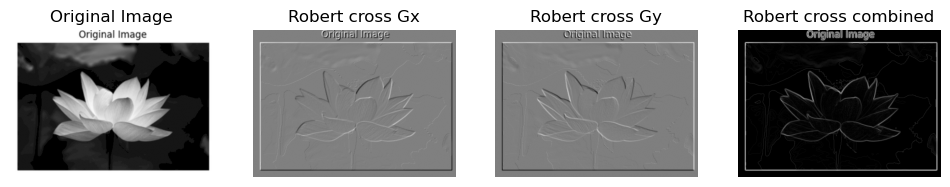

In [41]:
#Robert cross kernel

g_x = np.array([[1,0],
                [0,-1]])
g_y = np.array([[0,1],
                [-1,0]])


task1_img = cv2.imread('phool.png',cv2.IMREAD_GRAYSCALE)
output = convolution2d(task1_img,g_x)
output1 = convolution2d(task1_img,g_y)
combined = np.sqrt(output**2 + output1**2)



plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.imshow(task1_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')         
plt.subplot(1,4,2)
plt.imshow(output,cmap='gray')
plt.title('Robert cross Gx')        
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(output1,cmap='gray')     
plt.title('Robert cross Gy')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(combined,cmap='gray')     
plt.title('Robert cross combined')  
plt.axis('off')
plt.show()




155694
155694


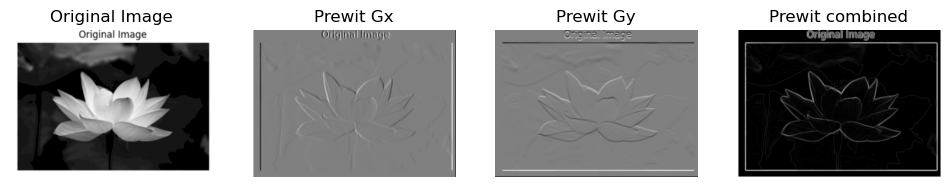

In [46]:
prewit_x = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])

prewit_y = np.array([[-1, -1, -1],
                     [ 0,  0,  0],
                     [ 1,  1,  1]])

output3= convolution2d(task1_img,prewit_x)
output4= convolution2d(task1_img,prewit_y)
combined1 = np.sqrt(output3**2 + output4**2)

plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.imshow(task1_img,cmap='gray')
plt.title('Original Image')     
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(output3,cmap='gray')
plt.title('Prewit Gx')  
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(output4,cmap='gray')
plt.title('Prewit Gy')  
plt.axis('off')


plt.subplot(1,4,4)
plt.imshow(combined1,cmap='gray')
plt.title('Prewit combined')
plt.axis('off')
plt.show()


155694
155694


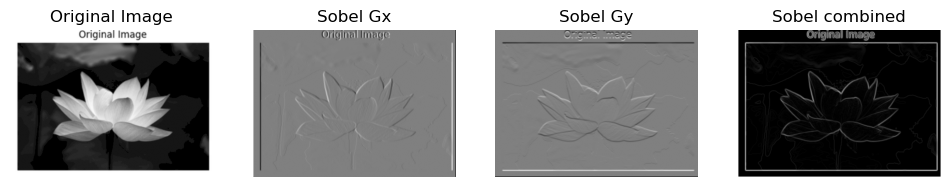

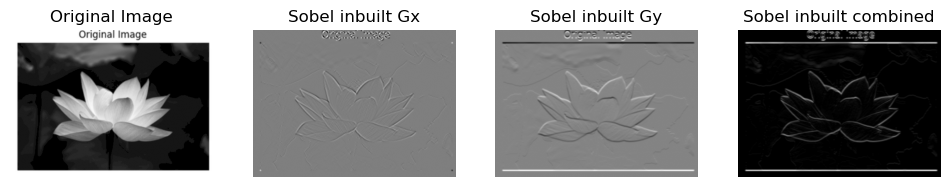

In [43]:
#sobel operator

sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

sobel_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])

output6 = convolution2d(task1_img,sobel_x)
output7= convolution2d(task1_img,sobel_y)
combined2 = np.sqrt(output6**2 + output7**2)

#sobel inbuilt function
sobel_x_in = cv2.Sobel(task1_img,cv2.CV_64F,1,1,ksize=5)
sobel_y_in = cv2.Sobel(task1_img,cv2.CV_64F,0,1,ksize=5)
combined_in = np.sqrt(sobel_x_in**2 + sobel_y_in**2)

plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.imshow(task1_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(output6,cmap='gray')
plt.title('Sobel Gx')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(output7,cmap='gray')
plt.title('Sobel Gy')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(combined2,cmap='gray')
plt.title('Sobel combined')
plt.axis('off')
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.imshow(task1_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(sobel_x_in,cmap='gray')
plt.title('Sobel inbuilt Gx')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(sobel_y_in,cmap='gray')
plt.title('Sobel inbuilt Gy')   
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(combined_in,cmap='gray')
plt.title('Sobel inbuilt combined')
plt.axis('off')
plt.show()




155694
155694


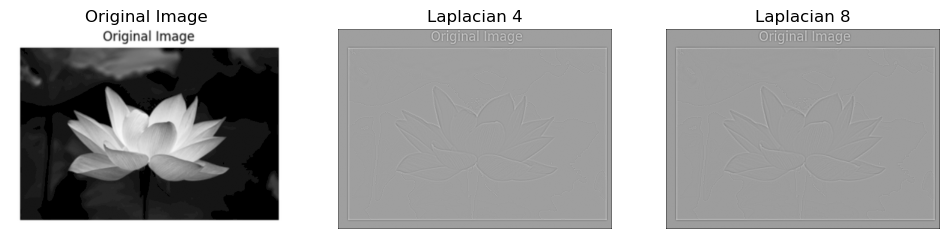

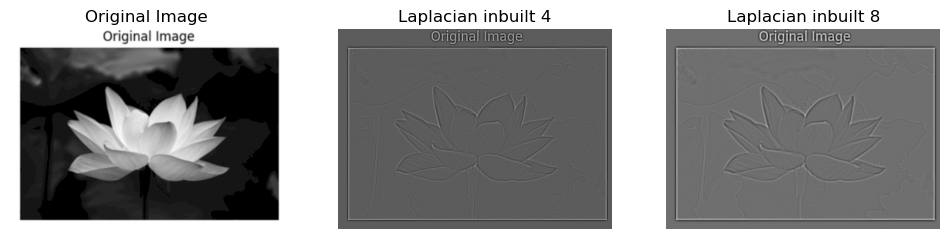

In [47]:
# laplacian operator

laplacian_4= np.array([[0,1,0],
                        [1,-4,1],
                        [0,1,0]])

laplacian_8= np.array([[1,1,1],
                        [1,-8,1],
                        [1,1,1]])

output9 = convolution2d(task1_img,laplacian_4)
output10 = convolution2d(task1_img,laplacian_8)

#inbuilt function
laplacian_4_in = cv2.Laplacian(task1_img,cv2.CV_64F,ksize=3)
laplacian_8_in = cv2.Laplacian(task1_img,cv2.CV_64F,ksize=5)

plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(task1_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(output9,cmap='gray')
plt.title('Laplacian 4')    
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(output10,cmap='gray')
plt.title('Laplacian 8')
plt.axis('off')
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(task1_img,cmap='gray')   
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(laplacian_4_in,cmap='gray')
plt.title('Laplacian inbuilt 4')

plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(laplacian_8_in,cmap='gray')
plt.title('Laplacian inbuilt 8')
plt.axis('off')
plt.show()

In [ ]:
# canny edge detection 

sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])
sobel_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])


canny_gx = convolution2d(task1_img,sobel_x)
canny_gy = convolution2d(task1_img,sobel_y)

combined_canny = np.sqrt(canny_gx**2 + canny_gy**2)
angle = np.arctan2(canny_gy, canny_gx)

angle = np.degrees(angle)

if angle > 180:
    angle -= 180    
if angle < 0:
    angle += 180

angle = angle +90

angle[angle >= 180] -= 180



task1_img_min = np.min(combined_canny)
task1_img_max = np.max(combined_canny)

threshold = (task1_img_min + task1_img_max) / 2
nms = np.zeros(combined_canny.shape)
h, w = combined_canny.shape
           

SyntaxError: invalid syntax (3282162580.py, line 28)